In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# to plot both bluesky and airassure data for pm1, pm2.5, pm4, pm10b

bluesky = [pd.read_csv(f'BlueSky/harmonization_results/level2_data/B{i+1}.csv') for i in range(22)]
airassure = [pd.read_csv(f'AirAssure/harmonization_results/level2_data/A{i+1}.csv') for i in range(21)]

bl_parameter = 'PM 2.5'
aa_parameter = 'pm2.5'

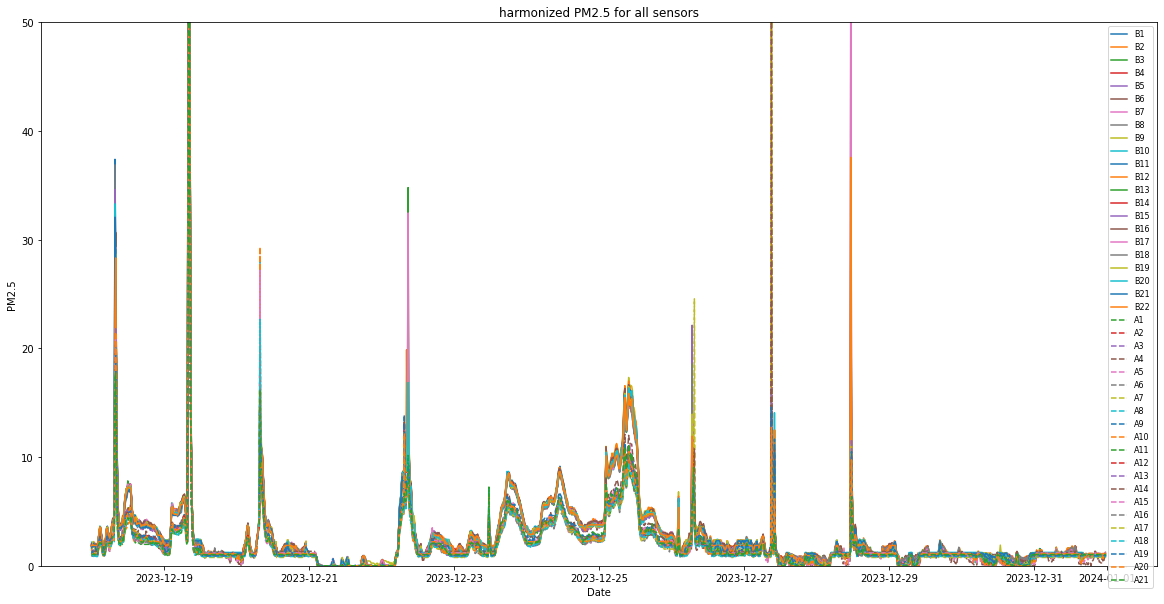

In [11]:
# plotting pm2.5
bluesky_dates = pd.date_range(bluesky[0]['Timestamp'].iloc[0], bluesky[0]['Timestamp'].iloc[-1], freq='15min')
for i, _ in enumerate(bluesky):
    plt.plot(bluesky_dates, bluesky[i]['PM 2.5'], label=f'B{i+1}')

airassure_dates = pd.date_range(airassure[0]['timestamp'].iloc[0], airassure[0]['timestamp'].iloc[-1], freq='15min')
for i, _ in enumerate(airassure):
    plt.plot(airassure_dates, airassure[i]['pm2.5'], '--', label=f'A{i+1}')

plt.legend(fontsize=8)
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('harmonized PM2.5 for all sensors')
plt.ylim(0, 50)

plt.rcParams["figure.figsize"] = (20,10)

plt.savefig('pm25.png', dpi=300)

/home/sakengali/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


average difference between airassure and bluesky: -1.0125790758300839


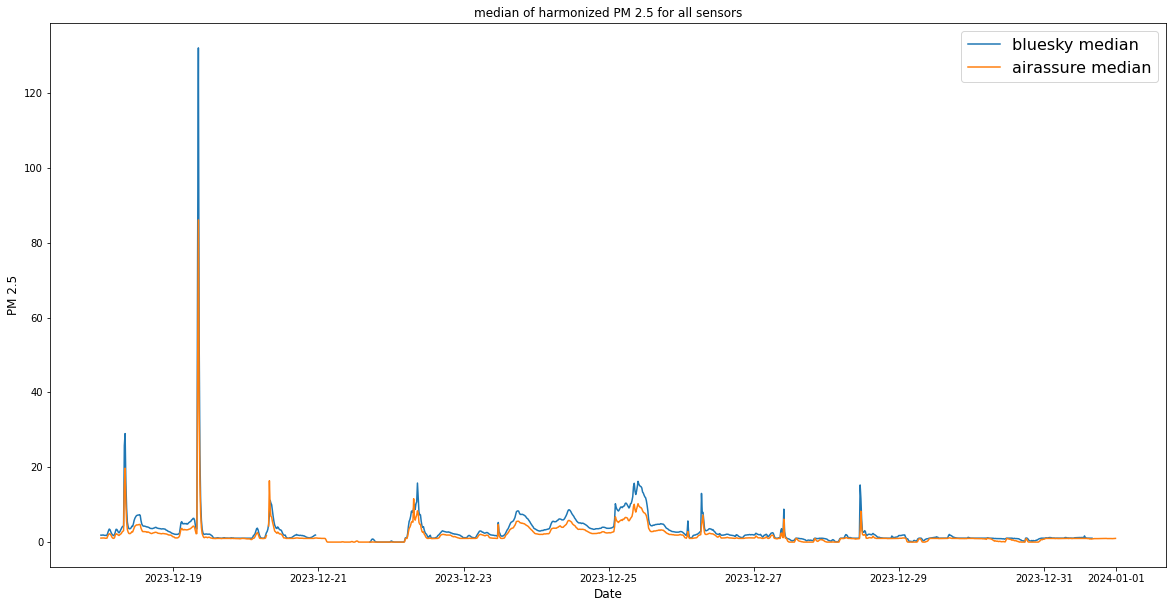

In [18]:
#bluesky
parameter_data = [bluesky[i][bl_parameter].values for i in range(22)]
parameter_data = np.array([parameter_data[i] for i in range(22)])
bl_median = np.nanmedian(parameter_data, axis=0)

#airassure
parameter_data = [airassure[i][aa_parameter].values for i in range(21)]
parameter_data = np.array([parameter_data[i] for i in range(21)])
aa_median = np.nanmedian(parameter_data, axis=0)

aa_median, bl_median

plt.plot(bluesky_dates, bl_median, label='bluesky median')
plt.plot(airassure_dates, aa_median, label='airassure median')
plt.title(f'median of harmonized {bl_parameter} for all sensors')
plt.xlabel('Date', fontsize=12)
plt.ylabel(bl_parameter, fontsize=12)
plt.legend(fontsize=16)

plt.rcParams["figure.figsize"] = (20,10)

plt.savefig(f'medians_{bl_parameter}.png', dpi=300)

average_difference = np.nanmean(aa_median[:1313] - bl_median)
print(f'average difference between airassure and bluesky: {average_difference}')